## Aplicando SVM para Chrun de Clientes

## Parte Teorica

### SVM para Classificação

### Metricas de Avaliação 

As métricas de avaliação de um modelo de classificação são fundamentais para entender a performance do modelo, especialmente quando temos diferentes tipos de erros e queremos avaliar como o modelo lida com cada um deles. Estas métricas provêm da matriz de confusão, que é uma tabela que compara as previsões do modelo com os valores reais.


Matriz de Confusão
A matriz de confusão para um problema de classificação binária pode ser organizada da seguinte maneira:

\[
\begin{array}{|c|c|c|}
\hline
 & \text{Predito Positivo (Classe 1)} & \text{Predito Negativo (Classe 0)} \\
\hline
\text{Real Positivo (Classe 1)} & \text{VP (Verdadeiros Positivos)} & \text{FN (Falsos Negativos)} \\
\hline
\text{Real Negativo (Classe 0)} & \text{FP (Falsos Positivos)} & \text{VN (Verdadeiros Negativos)} \\
\hline
\end{array}
\]

Onde:

VP: Verdadeiros Positivos (casos corretamente classificados como positivos)

VN: Verdadeiros Negativos (casos corretamente classificados como negativos)

FP: Falsos Positivos (casos erroneamente classificados como positivos)

FN: Falsos Negativos (casos erroneamente classificados como negativos)


1)  Acurácia

 A acurácia mede a eficiência geral do modelo, ou seja, a proporção de classificações corretas (tanto positivas quanto negativas) em relação ao total de observações,



 A fórmula da acurácia é.





$$Acuracia = \frac{VP + VN}{(VP + FN + VN + FP)} $$

-  Sensibilidade: percentual de classificações corretas considerando apenas as observações que são
evento. Esta medida também é chamada de Recall

$$Sensibilidade = \frac{VP}{(VP + FN)} $$



- Especificidade: percentual de classificações corretas considerado apenas as observações que não
são evento: 

$$Especificidade = \frac{VN}{(VC + FP)}$$



### Truque de Kernel 

*Classificação Não Linear* 

Quando não há separabilidade linear no espaço original das variáveis explicativas ($X$)

O SVM pode obter uma fronteira de decisão não linear: 

- Solução: os dados originais (X) são transformados para um novo espaço no qual as observações
são comparadas; nova dimensão dos dados onde pode ocorrer a separabilidade linear

- Na prática, o SVM aplica uma função (“kernel”) que mapeia os dados e obtém as similaridades
entre os pares de observações no espaço transformado; é utilizado como base no problema de
otimização que busca maximizar a margem e limitar violações para obter um hiperplano que
melhor separa as classes de Y


- Truque do kernel: não é necessário obter as coordenadas das observações nesse espaço
transformado; o kernel calcula a similaridade das observações no novo espaço
-  Kernel não lineares recorrentemente utilizados: Polinomial e RBF (Radial Basis Function)

1) Kernel Polinomial 

É dado por: $$K(a,b) = (\gamma a^{T} b + r)^{d} $$

em que: 

Substituindo os valores para a e b no kernel, obtém-se a relação de similaridade entre as observações proveniente do espaço
transformado (como se tivesse adicionado características polinomiais das variáveis $X$) No espaço transformado a separação é
pelo hiperplano, porém ao retornar para o espaço original (X) ela se mostra não linear!

2) Kernel Radial Basis Function (RBF)

É dado por: $$K(a,b) = e^{(-\gamma ||a - b||^{2})}$$

Baseia-se na distância Euclidiana entre
as observações: $||a - b||^{2}$ Portanto, gera uma “distância” entre
observações. Por meio dela, calcula-se o
quanto as observações se assemelham.
Varia de 0 (diferente) a 1 (semelhante)


## Parte Prática

### Pacotes 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import numpy as np

 *Target: churn -> 1: deixou de ser cliente; 0 continua cliente*

In [3]:
dados = pd.read_excel('dados_churn.xlsx')


In [4]:
dados.head()

,idade,sexo,cidade,categoria_plano,acessos_mes,valor_medio_transacao,reclamacao,churn
0,56,masculino,interior,basico,18,619.19,sim,1
1,23,feminino,interior,ouro,4,5334.66,nao,0
2,23,feminino,capital,basico,20,2326.62,sim,1
3,47,feminino,interior,sem,17,2344.58,sim,1
4,24,feminino,interior,sem,19,4456.50,sim,0


In [5]:
dados.columns

Index(['idade', 'sexo', 'cidade', 'categoria_plano', 'acessos_mes',
       'valor_medio_transacao', 'reclamacao', 'churn'],
      dtype='object')

In [6]:
## Variáveis Metreicas 
print(dados[['idade', 'acessos_mes', 'valor_medio_transacao']])


## Variáveis Categoricas 

print(dados['churn'].value_counts())
print(dados['sexo'].value_counts())
print(dados['cidade'].value_counts())
print(dados['categoria_plano'].value_counts())
print(dados['reclamacao'].value_counts())


      idade  acessos_mes  valor_medio_transacao
0        56           18                 619.19
1        23            4                5334.66
2        23           20                2326.62
3        47           17                2344.58
4        24           19                4456.50
...     ...          ...                    ...
5385     44           15                2004.61
5386     53           22                2034.34
5387     30           13                1070.64
5388     30           15                 395.24
5389     28           22                2233.78

[5390 rows x 3 columns]
churn
0    2698
1    2692
Name: count, dtype: int64
sexo
feminino     2863
masculino    2527
Name: count, dtype: int64
cidade
interior    3207
capital     2183
Name: count, dtype: int64
categoria_plano
sem         1281
basico      1254
ouro        1140
prata        987
platinum     728
Name: count, dtype: int64
reclamacao
nao    2722
sim    2668
Name: count, dtype: int64


In [7]:
dados.select_dtypes(include=['float64', 'int64']).describe()


,idade,acessos_mes,valor_medio_transacao,churn
count,5390.000000,5390.000000,5390.000000,5390.000000
mean,41.192208,12.766605,2857.860443,0.499443
std,13.481690,5.553906,1847.691791,0.500046
min,18.000000,1.000000,80.050000,0.000000
25%,30.000000,9.000000,1412.575000,0.000000
50%,41.000000,13.000000,2700.805000,0.000000
75%,53.000000,17.000000,4025.035000,1.000000
max,64.000000,26.000000,9974.260000,1.000000


### Criação das Variáveis Binarias 

In [8]:
dados = pd.get_dummies(dados, 
                       columns=['sexo',
                                'cidade',
                                'categoria_plano',
                                'reclamacao'],
                        drop_first=False,
                        dtype='float')

### Separando em Treino e Teste 

In [9]:
X = dados.drop(columns=['churn', 'sexo_feminino', 'cidade_interior', 'reclamacao_nao'])
y = dados['churn']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

### Padronização das variáveis métricas

In [11]:
# Vamos armazenar as informações de média e desvio padrão para previsões
media_idade, dp_idade = (X_train['idade'].mean(), X_train['idade'].std(ddof=1))
media_acessos, dp_acessos = (X_train['acessos_mes'].mean(), X_train['acessos_mes'].std(ddof=1))
media_valor, dp_valor = (X_train['valor_medio_transacao'].mean(), X_train['valor_medio_transacao'].std(ddof=1))

In [12]:
# No banco de dados de treino
X_train['idade'] = stats.zscore(X_train['idade'], ddof=1)
X_train['acessos_mes'] = stats.zscore(X_train['acessos_mes'], ddof=1)
X_train['valor_medio_transacao'] = stats.zscore(X_train['valor_medio_transacao'], ddof=1)

# No banco de dados de teste
X_test['idade'] = stats.zscore(X_test['idade'], ddof=1)
X_test['acessos_mes'] = stats.zscore(X_test['acessos_mes'], ddof=1)
X_test['valor_medio_transacao'] = stats.zscore(X_test['valor_medio_transacao'], ddof=1)

### Estimando o modelo SVM (linear)

In [13]:
svm_linear = SVC(kernel='linear', C=0.1)
svm_linear.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [14]:
pred_linear_train = svm_linear.predict(X_train)
pred_linear_test = svm_linear.predict(X_test)

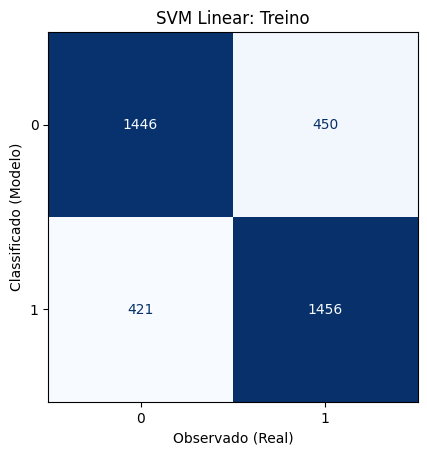

In [15]:
#%% Análise pela matriz de confusão (base de treino)

cm_linear_train = confusion_matrix(pred_linear_train, y_train)
cm_train_disp_linear = ConfusionMatrixDisplay(cm_linear_train)

plt.rcParams['figure.dpi'] = 100
cm_train_disp_linear.plot(colorbar=False, cmap='Blues')
plt.title('SVM Linear: Treino')
plt.xlabel('Observado (Real)')
plt.ylabel('Classificado (Modelo)')
plt.show()

In [16]:
acc_linear_train = accuracy_score(y_train, pred_linear_train)
sens_linear_train = recall_score(y_train, pred_linear_train, pos_label=1)
espec_linear_train = recall_score(y_train, pred_linear_train, pos_label=0)
prec_linear_train = precision_score(y_train, pred_linear_train)

In [17]:
print("Avaliação do SVM Linear (Base de Treino)")
print(f"Acurácia: {acc_linear_train:.1%}")
print(f"Sensibilidade: {sens_linear_train:.1%}")
print(f"Especificidade: {espec_linear_train:.1%}")
print(f"Precision: {prec_linear_train:.1%}")

Avaliação do SVM Linear (Base de Treino)
Acurácia: 76.9%
Sensibilidade: 76.4%
Especificidade: 77.5%
Precision: 77.6%


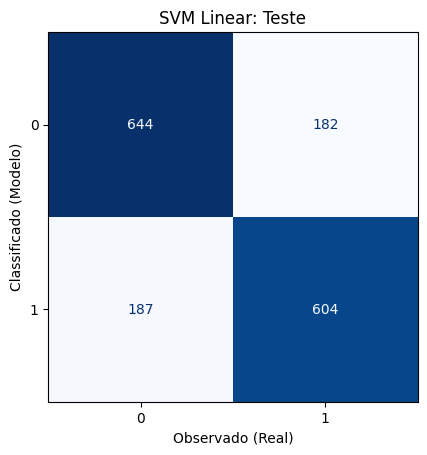

Avaliação do SVM Linear (Base de Teste)
Acurácia: 77.2%
Sensibilidade: 76.8%
Especificidade: 77.5%


In [18]:
#%% Análise pela matriz de confusão (base de teste)

cm_linear_test = confusion_matrix(pred_linear_test, y_test)
cm_test_disp_linear = ConfusionMatrixDisplay(cm_linear_test)

plt.rcParams['figure.dpi'] = 100
cm_test_disp_linear.plot(colorbar=False, cmap='Blues')
plt.title('SVM Linear: Teste')
plt.xlabel('Observado (Real)')
plt.ylabel('Classificado (Modelo)')
plt.show()

acc_linear_test = accuracy_score(y_test, pred_linear_test)
sens_linear_test = recall_score(y_test, pred_linear_test, pos_label=1)
espec_linear_test = recall_score(y_test, pred_linear_test, pos_label=0)
prec_linear_test = precision_score(y_test, pred_linear_test)

print("Avaliação do SVM Linear (Base de Teste)")
print(f"Acurácia: {acc_linear_test:.1%}")
print(f"Sensibilidade: {sens_linear_test:.1%}")
print(f"Especificidade: {espec_linear_test:.1%}")

### Modelo Polinomial 

In [19]:
svm_pol = SVC(kernel='poly', degree=2, coef0=0, C = 0.1)
svm_pol.fit(X_train, y_train)

SVC(C=0.1, coef0=0, degree=2, kernel='poly')

In [20]:
# Base de dados de treinamento
pred_pol_train = svm_pol.predict(X_train)

# Base de dados de teste
pred_pol_test = svm_pol.predict(X_test)

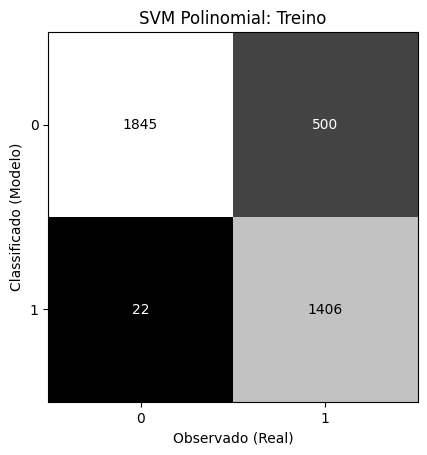

Avaliação do SVM Polinomial (Base de Treino)
Acurácia: 86.2%
Sensibilidade: 73.8%
Especificidade: 98.8%
Precision: 98.5%


In [21]:
#%% Análise pela matriz de confusão (base de treino)

cm_pol_train = confusion_matrix(pred_pol_train, y_train)
cm_train_disp_pol = ConfusionMatrixDisplay(cm_pol_train)

plt.rcParams['figure.dpi'] = 100
cm_train_disp_pol.plot(colorbar=False, cmap='gray')
plt.title('SVM Polinomial: Treino')
plt.xlabel('Observado (Real)')
plt.ylabel('Classificado (Modelo)')
plt.show()

acc_pol_train = accuracy_score(y_train, pred_pol_train)
sens_pol_train = recall_score(y_train, pred_pol_train, pos_label=1)
espec_pol_train = recall_score(y_train, pred_pol_train, pos_label=0)
prec_pol_train = precision_score(y_train, pred_pol_train)

print("Avaliação do SVM Polinomial (Base de Treino)")
print(f"Acurácia: {acc_pol_train:.1%}")
print(f"Sensibilidade: {sens_pol_train:.1%}")
print(f"Especificidade: {espec_pol_train:.1%}")
print(f"Precision: {prec_pol_train:.1%}")

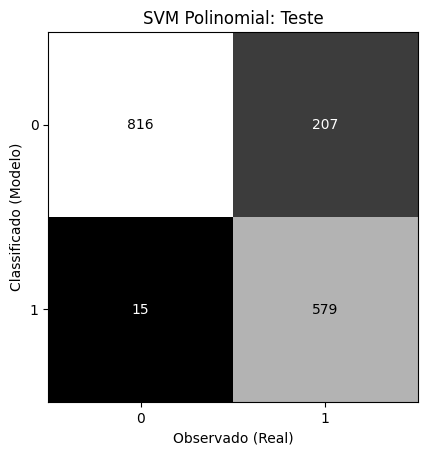

Avaliação do SVM Polinomial (Base de Teste)
Acurácia: 86.3%
Sensibilidade: 73.7%
Especificidade: 98.2%
Precision: 97.5%


In [22]:
#%% Análise pela matriz de confusão (base de teste)
cm_pol_test = confusion_matrix(pred_pol_test, y_test)
cm_test_disp_pol = ConfusionMatrixDisplay(cm_pol_test)

plt.rcParams['figure.dpi'] = 100
cm_test_disp_pol.plot(colorbar=False, cmap='gray')
plt.title('SVM Polinomial: Teste')
plt.xlabel('Observado (Real)')
plt.ylabel('Classificado (Modelo)')
plt.show()

acc_pol_test = accuracy_score(y_test, pred_pol_test)
sens_pol_test = recall_score(y_test, pred_pol_test, pos_label=1)
espec_pol_test = recall_score(y_test, pred_pol_test, pos_label=0)
prec_pol_test = precision_score(y_test, pred_pol_test)

print("Avaliação do SVM Polinomial (Base de Teste)")
print(f"Acurácia: {acc_pol_test:.1%}")
print(f"Sensibilidade: {sens_pol_test:.1%}")
print(f"Especificidade: {espec_pol_test:.1%}")
print(f"Precision: {prec_pol_test:.1%}")


### Estimando o modelo SVM (RBF)

In [23]:
svm_rbf = SVC(kernel='rbf', C=0.1, gamma=1)
svm_rbf.fit(X_train, y_train)

SVC(C=0.1, gamma=1)

In [24]:
#%% Categorias preditas pelo modelo RBF

# Base de dados de treinamento 

pred_rbf_train = svm_rbf.predict(X_train)


# Base de dados de teste 

pred_rbf_test = svm_rbf.predict(X_test)

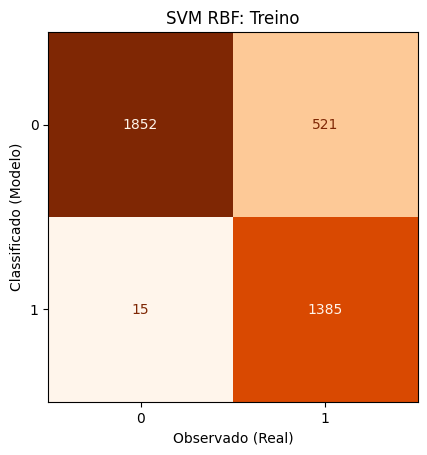

In [25]:
cm_rbf_train = confusion_matrix(pred_rbf_train, y_train)
cm_train_disp_rbf = ConfusionMatrixDisplay(cm_rbf_train)

plt.rcParams['figure.dpi'] = 100
cm_train_disp_rbf.plot(colorbar=False, cmap='Oranges')
plt.title('SVM RBF: Treino')
plt.xlabel('Observado (Real)')
plt.ylabel('Classificado (Modelo)')
plt.show()

In [26]:
acc_rbf_train = accuracy_score(y_train, pred_rbf_train)
sens_rbf_train = recall_score(y_train, pred_rbf_train, pos_label=1)
espec_rbf_train = recall_score(y_train, pred_rbf_train, pos_label=0)
prec_rbf_train = precision_score(y_train, pred_rbf_train)

print("Avaliação do SVM RBF (Base de Treino)")
print(f"Acurácia: {acc_rbf_train:.1%}")
print(f"Sensibilidade: {sens_rbf_train:.1%}")
print(f"Especificidade: {espec_rbf_train:.1%}")
print(f"Precision: {prec_rbf_train:.1%}")

Avaliação do SVM RBF (Base de Treino)
Acurácia: 85.8%
Sensibilidade: 72.7%
Especificidade: 99.2%
Precision: 98.9%


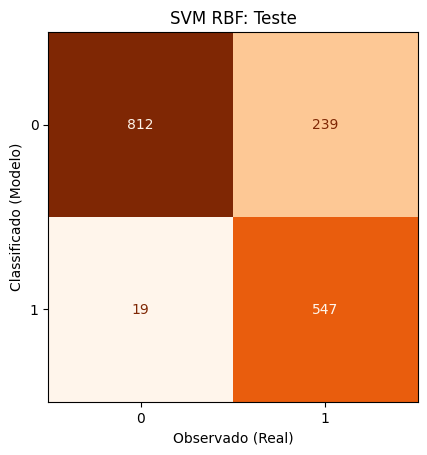

Avaliação do SVM RBF (Base de Teste)
Acurácia: 84.0%
Sensibilidade: 69.6%
Especificidade: 97.7%
Precision: 96.6%


In [27]:
#%% Análise pela matriz de confusão (base de teste)

cm_rbf_test = confusion_matrix(pred_rbf_test, y_test)
cm_test_disp_rbf = ConfusionMatrixDisplay(cm_rbf_test)

plt.rcParams['figure.dpi'] = 100
cm_test_disp_rbf.plot(colorbar=False, cmap='Oranges')
plt.title('SVM RBF: Teste')
plt.xlabel('Observado (Real)')
plt.ylabel('Classificado (Modelo)')
plt.show()

acc_rbf_test = accuracy_score(y_test, pred_rbf_test)
sens_rbf_test = recall_score(y_test, pred_rbf_test, pos_label=1)
espec_rbf_test = recall_score(y_test, pred_rbf_test, pos_label=0)
prec_rbf_test = precision_score(y_test, pred_rbf_test)

print("Avaliação do SVM RBF (Base de Teste)")
print(f"Acurácia: {acc_rbf_test:.1%}")
print(f"Sensibilidade: {sens_rbf_test:.1%}")
print(f"Especificidade: {espec_rbf_test:.1%}")
print(f"Precision: {prec_rbf_test:.1%}")

## Validação Cruzada (GridSearchCV)